In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew


In [2]:
df= pd.read_csv('car_selling.csv')
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [3]:
df.tail(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
4330,Tata Indica Vista Aqua 1.4 TDI,2010,150000,130000,Diesel,Individual,Manual,Second Owner
4331,Ford EcoSport 1.5 TDCi Titanium BSIV,2015,530000,175000,Diesel,Individual,Manual,Third Owner
4332,Mahindra Scorpio S2 7 Seater,2015,750000,120000,Diesel,Individual,Manual,First Owner
4333,Maruti Ritz VDi,2012,225000,90000,Diesel,Individual,Manual,Second Owner
4334,Toyota Innova 2.5 VX (Diesel) 8 Seater BS IV,2012,600000,170000,Diesel,Individual,Manual,First Owner
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner
4339,Renault KWID RXT,2016,225000,40000,Petrol,Individual,Manual,First Owner


In [4]:
print("Attributes in the dataset:")
print(df.columns.tolist())

Attributes in the dataset:
['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner']
Total number of attributes: 8


In [5]:
print("\nData types of each attribute:")
print(df.dtypes)



Data types of each attribute:
name             object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
dtype: object



Statistical Measures:
Selling Price - Mean: 504127.31, Median: 350000.00, Mode: 300000.00
KM Driven - Mean: 66215.78, Median: 60000.00, Mode: 70000.00


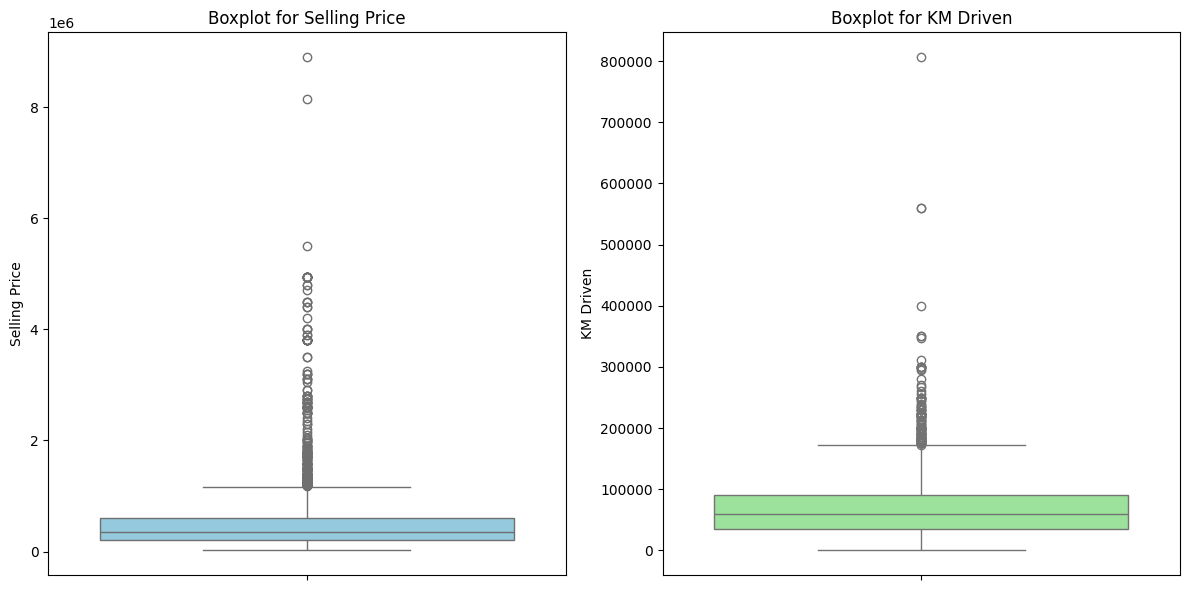

In [8]:
selling_price_mean = df['selling_price'].mean()
selling_price_median = df['selling_price'].median()
selling_price_mode = df['selling_price'].mode()[0]

km_driven_mean = df['km_driven'].mean()
km_driven_median = df['km_driven'].median()
km_driven_mode = df['km_driven'].mode()[0]

# Print the statistical measures
print("\nStatistical Measures:")
print("Selling Price - Mean: {:.2f}, Median: {:.2f}, Mode: {:.2f}".format(selling_price_mean, selling_price_median, selling_price_mode))
print("KM Driven - Mean: {:.2f}, Median: {:.2f}, Mode: {:.2f}".format(km_driven_mean, km_driven_median, km_driven_mode))

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=df['selling_price'], color='skyblue')
plt.title("Boxplot for Selling Price")
plt.ylabel("Selling Price")

plt.subplot(1, 2, 2)
sns.boxplot(y=df['km_driven'], color='lightgreen')
plt.title("Boxplot for KM Driven")
plt.ylabel("KM Driven")

plt.tight_layout()
plt.show()


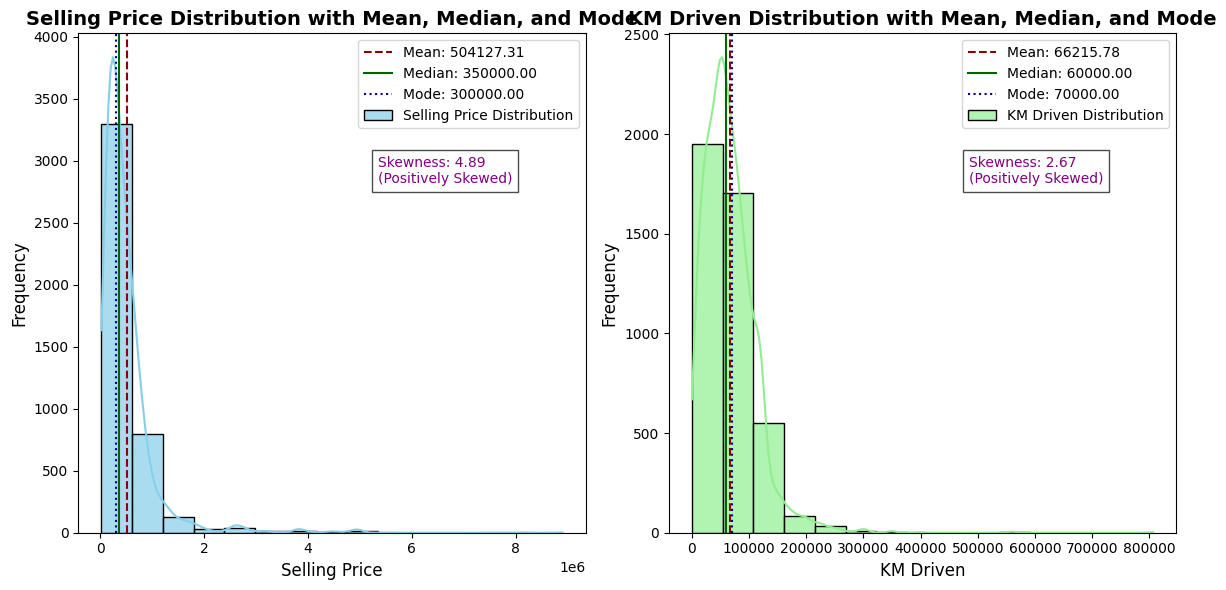

In [7]:
selling_price_skewness = skew(df['selling_price'])
km_driven_skewness = skew(df['km_driven'])

def skew_type(skewness):
    if skewness > 0:
        return "Positively Skewed"
    elif skewness < 0:
        return "Negatively Skewed"
    else:
        return "Symmetrical"

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['selling_price'], kde=True, bins=15, color='skyblue', label='Selling Price Distribution', alpha=0.7)
plt.axvline(df['selling_price'].mean(), color='darkred', linestyle='--', label=f'Mean: {df["selling_price"].mean():.2f}', linewidth=1.5)
plt.axvline(df['selling_price'].median(), color='darkgreen', linestyle='-', label=f'Median: {df["selling_price"].median():.2f}', linewidth=1.5)
plt.axvline(df['selling_price'].mode()[0], color='darkblue', linestyle=':', label=f'Mode: {df["selling_price"].mode()[0]:.2f}', linewidth=1.5)
plt.title("Selling Price Distribution with Mean, Median, and Mode", fontsize=14, fontweight='bold')
plt.xlabel("Selling Price", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend(fontsize=10)
plt.text(df['selling_price'].max() * 0.6, plt.ylim()[1] * 0.7, 
         f"Skewness: {selling_price_skewness:.2f}\n({skew_type(selling_price_skewness)})", 
         fontsize=10, color='purple', bbox=dict(facecolor='white', alpha=0.7))

# KM Driven Distribution
plt.subplot(1, 2, 2)
sns.histplot(df['km_driven'], kde=True, bins=15, color='lightgreen', label='KM Driven Distribution', alpha=0.7)
plt.axvline(df['km_driven'].mean(), color='darkred', linestyle='--', label=f'Mean: {df["km_driven"].mean():.2f}', linewidth=1.5)
plt.axvline(df['km_driven'].median(), color='darkgreen', linestyle='-', label=f'Median: {df["km_driven"].median():.2f}', linewidth=1.5)
plt.axvline(df['km_driven'].mode()[0], color='darkblue', linestyle=':', label=f'Mode: {df["km_driven"].mode()[0]:.2f}', linewidth=1.5)
plt.title("KM Driven Distribution with Mean, Median, and Mode", fontsize=14, fontweight='bold')
plt.xlabel("KM Driven", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend(fontsize=10)
plt.text(df['km_driven'].max() * 0.6, plt.ylim()[1] * 0.7, 
         f"Skewness: {km_driven_skewness:.2f}\n({skew_type(km_driven_skewness)})", 
         fontsize=10, color='purple', bbox=dict(facecolor='white', alpha=0.7))

plt.tight_layout()
plt.show()

